In [1]:
import pandas as pd


In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
stores=pd.read_csv('stores.csv')
oil=pd.read_csv('oil.csv')
holidays=pd.read_csv('holidays_events.csv')
transactions=pd.read_csv('transactions.csv')

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0


In [4]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [7]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [8]:
train_df=train.copy()

In [10]:
train = train.merge(stores, on='store_nbr', how='left')
train = train.merge(oil, on='date', how='left')
train = train.merge(holidays[['date', 'type']], on='date', how='left')

In [11]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city_x,state_x,type_x,cluster_x,dcoilwtico_x,city_y,state_y,type_y,cluster_y,dcoilwtico_y,type
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13.0,NaN,Quito,Pichincha,D,13.0,NaN,Holiday
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13.0,NaN,Quito,Pichincha,D,13.0,NaN,Holiday
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13.0,NaN,Quito,Pichincha,D,13.0,NaN,Holiday
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13.0,NaN,Quito,Pichincha,D,13.0,NaN,Holiday
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13.0,NaN,Quito,Pichincha,D,13.0,NaN,Holiday


In [12]:
train.describe()

,id,store_nbr,sales,onpromotion,cluster_x,dcoilwtico_x,cluster_y,dcoilwtico_y
count,188350.000000,188349.000000,188349.000000,188349.0,188349.000000,127762.000000,188349.000000,127762.000000
mean,94174.500000,27.475288,198.053176,0.0,8.476052,94.178293,8.476052,94.178293
std,54372.105938,15.566582,673.216292,0.0,4.650338,2.167379,4.650338,2.167379
min,0.000000,1.000000,0.000000,0.0,1.000000,88.730000,1.000000,88.730000
25%,47087.250000,14.000000,0.000000,0.0,4.000000,92.790000,4.000000,92.790000
50%,94174.500000,27.000000,0.000000,0.0,8.000000,93.710000,8.000000,93.710000
75%,141261.750000,41.000000,88.259000,0.0,13.000000,95.990000,13.000000,95.990000
max,188349.000000,54.000000,26067.000000,0.0,17.000000,97.980000,17.000000,97.980000


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188350 entries, 0 to 188349
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            188350 non-null  int64  
 1   date          188350 non-null  object 
 2   store_nbr     188349 non-null  float64
 3   family        188349 non-null  object 
 4   sales         188349 non-null  float64
 5   onpromotion   188349 non-null  float64
 6   city_x        188349 non-null  object 
 7   state_x       188349 non-null  object 
 8   type_x        188349 non-null  object 
 9   cluster_x     188349 non-null  float64
 10  dcoilwtico_x  186568 non-null  float64
 11  city_y        188349 non-null  object 
 12  state_y       188349 non-null  object 
 13  type_y        188349 non-null  object 
 14  cluster_y     188349 non-null  float64
 15  dcoilwtico_y  186568 non-null  float64
 16  type          16038 non-null   object 
dtypes: float64(7), int64(1), object(9)
memory usage:

In [15]:
train['dcoilwtico_x'] = train['dcoilwtico_x'].interpolate()

In [16]:
train['dcoilwtico_y'] = train['dcoilwtico_y'].interpolate()

In [19]:
train['date'] = pd.to_datetime(train['date'])

In [20]:
train['day'] = train['date'].dt.day
train['month'] = train['date'].dt.month
train['year'] = train['date'].dt.year
train['day_of_week'] = train['date'].dt.weekday

In [21]:
train

,id,date,store_nbr,family,sales,onpromotion,city_x,state_x,type_x,cluster_x,...,city_y,state_y,type_y,cluster_y,dcoilwtico_y,type,day,month,year,day_of_week
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13.0,...,Quito,Pichincha,D,13.0,NaN,Holiday,1,1,2013,1
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13.0,...,Quito,Pichincha,D,13.0,NaN,Holiday,1,1,2013,1
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13.0,...,Quito,Pichincha,D,13.0,NaN,Holiday,1,1,2013,1
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13.0,...,Quito,Pichincha,D,13.0,NaN,Holiday,1,1,2013,1
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13.0,...,Quito,Pichincha,D,13.0,NaN,Holiday,1,1,2013,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188345,188345,2013-04-16,43.0,HARDWARE,0.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,Esmeraldas,Esmeraldas,E,10.0,88.73,NaN,16,4,2013,1
188346,188346,2013-04-16,43.0,HOME AND KITCHEN I,0.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,Esmeraldas,Esmeraldas,E,10.0,88.73,NaN,16,4,2013,1
188347,188347,2013-04-16,43.0,HOME AND KITCHEN II,0.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,Esmeraldas,Esmeraldas,E,10.0,88.73,NaN,16,4,2013,1
188348,188348,2013-04-16,43.0,HOME APPLIANCES,1.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,Esmeraldas,Esmeraldas,E,10.0,88.73,NaN,16,4,2013,1


In [23]:
import numpy as np

In [25]:
train['holiday_flag'] = np.where(train['type'].notnull(), 1, 0)
train['payday_flag'] = np.where((train['day'] == 15) | (train['day'] == train['date'].dt.days_in_month), 1, 0)

In [26]:
train

,id,date,store_nbr,family,sales,onpromotion,city_x,state_x,type_x,cluster_x,...,type_y,cluster_y,dcoilwtico_y,type,day,month,year,day_of_week,holiday_flag,payday_flag
0,0,2013-01-01,1.0,AUTOMOTIVE,0.0,0.0,Quito,Pichincha,D,13.0,...,D,13.0,NaN,Holiday,1,1,2013,1,1,0
1,1,2013-01-01,1.0,BABY CARE,0.0,0.0,Quito,Pichincha,D,13.0,...,D,13.0,NaN,Holiday,1,1,2013,1,1,0
2,2,2013-01-01,1.0,BEAUTY,0.0,0.0,Quito,Pichincha,D,13.0,...,D,13.0,NaN,Holiday,1,1,2013,1,1,0
3,3,2013-01-01,1.0,BEVERAGES,0.0,0.0,Quito,Pichincha,D,13.0,...,D,13.0,NaN,Holiday,1,1,2013,1,1,0
4,4,2013-01-01,1.0,BOOKS,0.0,0.0,Quito,Pichincha,D,13.0,...,D,13.0,NaN,Holiday,1,1,2013,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188345,188345,2013-04-16,43.0,HARDWARE,0.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,E,10.0,88.73,NaN,16,4,2013,1,0,0
188346,188346,2013-04-16,43.0,HOME AND KITCHEN I,0.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,E,10.0,88.73,NaN,16,4,2013,1,0,0
188347,188347,2013-04-16,43.0,HOME AND KITCHEN II,0.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,E,10.0,88.73,NaN,16,4,2013,1,0,0
188348,188348,2013-04-16,43.0,HOME APPLIANCES,1.0,0.0,Esmeraldas,Esmeraldas,E,10.0,...,E,10.0,88.73,NaN,16,4,2013,1,0,0


In [27]:
train['lag_7'] = train.groupby(['store_nbr', 'family'])['sales'].shift(7)
train['lag_30'] = train.groupby(['store_nbr', 'family'])['sales'].shift(30)
train['rolling_mean_7'] = train.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7).mean())
train['rolling_std_7'] = train.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(window=7).std())

In [28]:
train.isnull().sum()

,0
id,0
date,0
store_nbr,1
family,1
sales,1
onpromotion,1
city_x,1
state_x,1
type_x,1
cluster_x,1


In [29]:
train['type'].fillna('unknown', inplace=True)

<ipython-input-29-71b9276b77af>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['type'].fillna('unknown', inplace=True)


In [30]:
train['lag_7'].fillna(0, inplace=True)
train['lag_30'].fillna(0, inplace=True)
train['rolling_mean_7'].fillna(0, inplace=True)
train['rolling_std_7'].fillna(0, inplace=True)

<ipython-input-30-5c65de06980c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['lag_7'].fillna(0, inplace=True)
<ipython-input-30-5c65de06980c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

In [31]:
train.drop(columns=['cluster_x', 'cluster_y', 'city_y', 'state_y', 'type_y'], inplace=True, errors='ignore')

In [32]:
train.isnull().sum()

,0
id,0
date,0
store_nbr,1
family,1
sales,1
onpromotion,1
city_x,1
state_x,1
type_x,1
dcoilwtico_x,1782


In [33]:
train.dropna(inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186567 entries, 1782 to 188348
Data columns (total 22 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              186567 non-null  int64         
 1   date            186567 non-null  datetime64[ns]
 2   store_nbr       186567 non-null  float64       
 3   family          186567 non-null  object        
 4   sales           186567 non-null  float64       
 5   onpromotion     186567 non-null  float64       
 6   city_x          186567 non-null  object        
 7   state_x         186567 non-null  object        
 8   type_x          186567 non-null  object        
 9   dcoilwtico_x    186567 non-null  float64       
 10  dcoilwtico_y    186567 non-null  float64       
 11  type            186567 non-null  object        
 12  day             186567 non-null  int32         
 13  month           186567 non-null  int32         
 14  year            186567 non-null  int32

In [39]:
from sklearn.preprocessing import LabelEncoder

In [114]:
le = LabelEncoder()
train['family'] = le.fit_transform(train['family'])

In [116]:
train

,id,date,store_nbr,family,sales,onpromotion,city_x,state_x,type_x,dcoilwtico_x,...,day,month,year,day_of_week,holiday_flag,payday_flag,lag_7,lag_30,rolling_mean_7,rolling_std_7
1782,1782,2013-01-02,1.0,0,2.0,0.0,Quito,Pichincha,D,93.14,...,2,1,2013,2,0,0,0.0,0.0,0.000000,0.000000
1783,1783,2013-01-02,1.0,1,0.0,0.0,Quito,Pichincha,D,93.14,...,2,1,2013,2,0,0,0.0,0.0,0.000000,0.000000
1784,1784,2013-01-02,1.0,2,2.0,0.0,Quito,Pichincha,D,93.14,...,2,1,2013,2,0,0,0.0,0.0,0.000000,0.000000
1785,1785,2013-01-02,1.0,3,1091.0,0.0,Quito,Pichincha,D,93.14,...,2,1,2013,2,0,0,0.0,0.0,0.000000,0.000000
1786,1786,2013-01-02,1.0,4,0.0,0.0,Quito,Pichincha,D,93.14,...,2,1,2013,2,0,0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188344,188344,2013-04-16,43.0,13,3.0,0.0,Esmeraldas,Esmeraldas,E,88.73,...,16,4,2013,1,0,0,2.0,8.0,3.714286,2.138090
188345,188345,2013-04-16,43.0,14,0.0,0.0,Esmeraldas,Esmeraldas,E,88.73,...,16,4,2013,1,0,0,7.0,3.0,1.142857,1.463850
188346,188346,2013-04-16,43.0,15,0.0,0.0,Esmeraldas,Esmeraldas,E,88.73,...,16,4,2013,1,0,0,0.0,0.0,0.000000,0.000000
188347,188347,2013-04-16,43.0,16,0.0,0.0,Esmeraldas,Esmeraldas,E,88.73,...,16,4,2013,1,0,0,0.0,0.0,0.000000,0.000000


<Axes: >

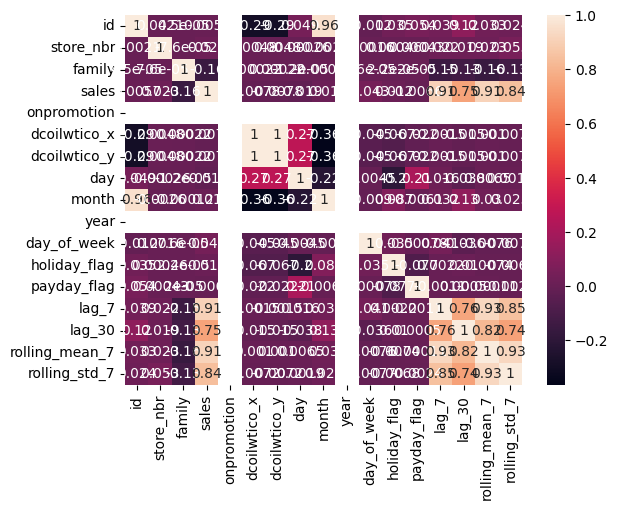

In [117]:
import seaborn as sns
# Include only numerical features for correlation calculation
numerical_features = train.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), annot=True)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


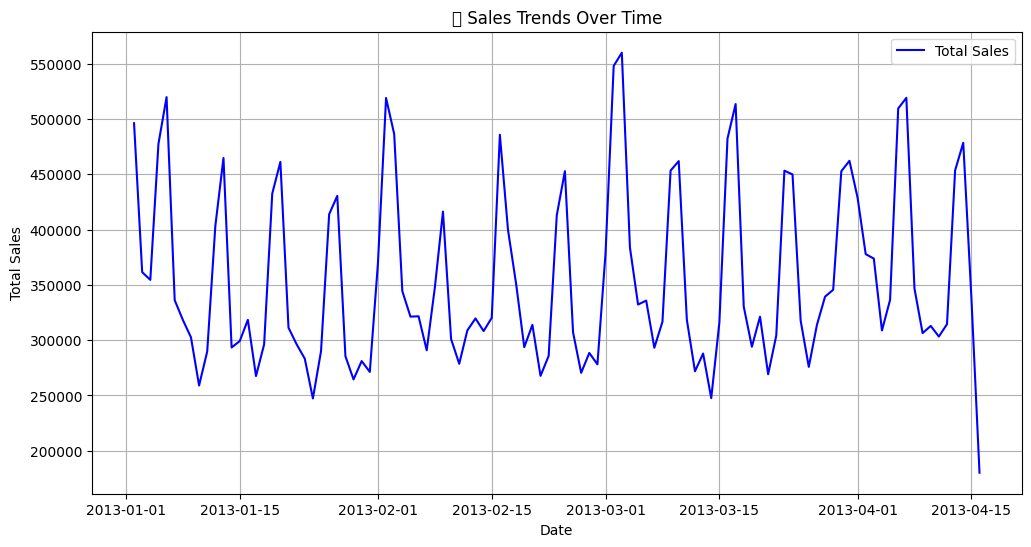

In [118]:
import matplotlib.pyplot as plt

# Aggregate sales by date to plot overall sales trend
sales_trend = train.groupby('date')['sales'].sum().reset_index()

# Plot sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trend['date'], sales_trend['sales'], color='blue', label='Total Sales')
plt.title('📊 Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


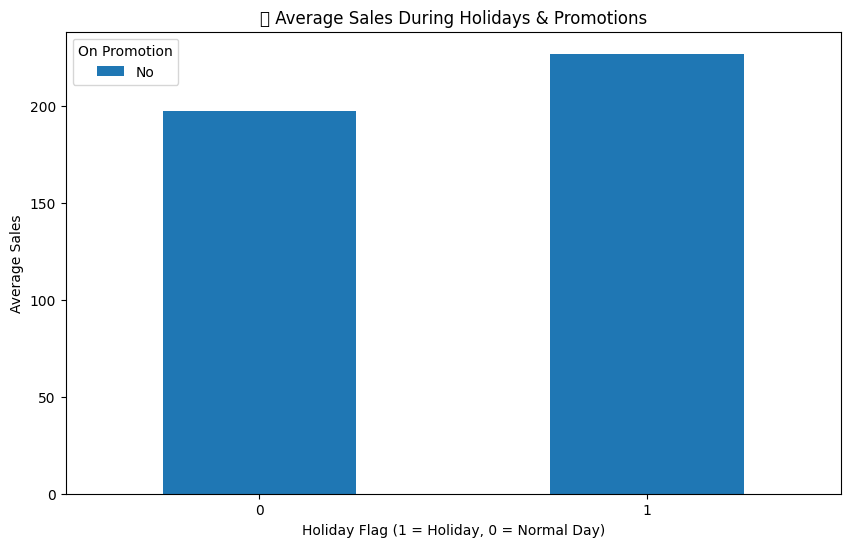

In [119]:
# Plot average sales before and after holidays/promotions
promo_sales = train.groupby(['holiday_flag', 'onpromotion'])['sales'].mean().unstack()

promo_sales.plot(kind='bar', figsize=(10, 6))
plt.title('🎉 Average Sales During Holidays & Promotions')
plt.xlabel('Holiday Flag (1 = Holiday, 0 = Normal Day)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.legend(title='On Promotion', labels=['No', 'Yes'])
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9981 (\N{FUEL PUMP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


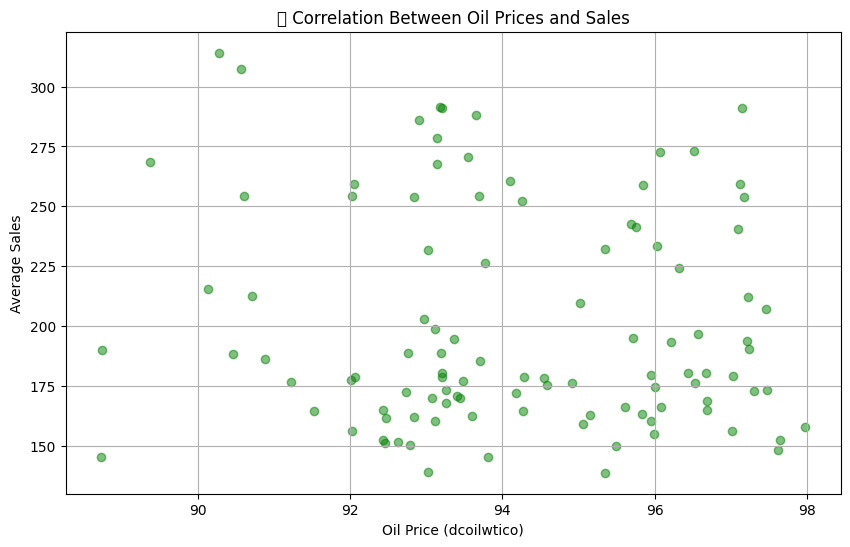

In [120]:
# Plot oil prices vs. total sales to check correlation
oil_sales_correlation = train.groupby('date')[['dcoilwtico_x', 'sales']].mean().dropna()

plt.figure(figsize=(10, 6))
plt.scatter(oil_sales_correlation['dcoilwtico_x'], oil_sales_correlation['sales'], color='green', alpha=0.5)
plt.title('⛽ Correlation Between Oil Prices and Sales')
plt.xlabel('Oil Price (dcoilwtico)')
plt.ylabel('Average Sales')
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128184 (\N{MONEY WITH WINGS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


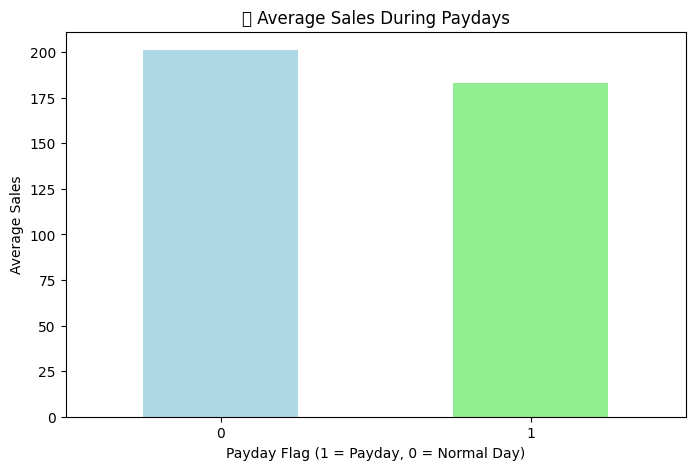

In [121]:
# Compare sales on payday vs non-payday
payday_sales = train.groupby('payday_flag')['sales'].mean()

# Plot sales before and after paydays
payday_sales.plot(kind='bar', figsize=(8, 5), color=['lightblue', 'lightgreen'])
plt.title('💸 Average Sales During Paydays')
plt.xlabel('Payday Flag (1 = Payday, 0 = Normal Day)')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()


In [76]:
X = train[['store_nbr', 'family', 'day', 'month', 'year', 'day_of_week','onpromotion']]
y = train['sales']

In [77]:
X

,store_nbr,family,day,month,year,day_of_week,onpromotion
1782,1.0,0,2,1,2013,2,0.0
1783,1.0,1,2,1,2013,2,0.0
1784,1.0,2,2,1,2013,2,0.0
1785,1.0,3,2,1,2013,2,0.0
1786,1.0,4,2,1,2013,2,0.0
...,...,...,...,...,...,...,...
188344,43.0,13,16,4,2013,1,0.0
188345,43.0,14,16,4,2013,1,0.0
188346,43.0,15,16,4,2013,1,0.0
188347,43.0,16,16,4,2013,1,0.0


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#**Random Forest Regressor**

In [79]:
from sklearn.ensemble import RandomForestRegressor
model_rf=RandomForestRegressor(n_estimators=100,random_state=7)
model_rf.fit(X_train,y_train)

RandomForestRegressor(random_state=7)

In [80]:
Y_pred_rf=model_rf.predict(X_test)

#**XGBoost**

In [81]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(n_estimators=100,learning_rate=0.05)
model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [82]:
Y_pred_xgb=model_xgb.predict(X_test)

#**ARIMA**

In [83]:
from statsmodels.tsa.arima.model import ARIMA
model_arima=ARIMA(y_train,order=(5,1,0))
model_arima_fit=model_arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [84]:
Y_pred_arima=model_arima_fit.forecast(steps=len(y_test))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#**LSTM**

In [85]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [86]:
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

In [87]:
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [88]:
model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=2)
Y_pred_lstm = model_lstm.predict(X_test_lstm)

Epoch 1/50
4665/4665 - 16s - 3ms/step - loss: 453991.7500 - val_loss: 458493.3438
Epoch 2/50
4665/4665 - 13s - 3ms/step - loss: 447907.1875 - val_loss: 452756.4062
Epoch 3/50
4665/4665 - 13s - 3ms/step - loss: 444673.0625 - val_loss: 451345.3438
Epoch 4/50
4665/4665 - 13s - 3ms/step - loss: 444263.0625 - val_loss: 451158.4688
Epoch 5/50
4665/4665 - 13s - 3ms/step - loss: 444156.0000 - val_loss: 450961.5938
Epoch 6/50
4665/4665 - 13s - 3ms/step - loss: 444169.1875 - val_loss: 451536.4375
Epoch 7/50
4665/4665 - 21s - 5ms/step - loss: 444099.6250 - val_loss: 450769.8125
Epoch 8/50
4665/4665 - 20s - 4ms/step - loss: 444007.0938 - val_loss: 451274.2500
Epoch 9/50
4665/4665 - 20s - 4ms/step - loss: 444009.8438 - val_loss: 450686.1562
Epoch 10/50
4665/4665 - 13s - 3ms/step - loss: 443909.7812 - val_loss: 450651.4688
Epoch 11/50
4665/4665 - 21s - 5ms/step - loss: 443886.0625 - val_loss: 450803.7812
Epoch 12/50
4665/4665 - 13s - 3ms/step - loss: 443905.7188 - val_loss: 450816.5000
Epoch 13/50
4

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

#**Model Comparision on Mestrics**

In [64]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - RMSE: {rmse:.2f}, MAPE: {mape:.2%}, R2: {r2:.2f}')


In [89]:
evaluate_model(y_test,Y_pred_rf,'Random Forest')
evaluate_model(y_test,Y_pred_xgb,'XGBoost')
evaluate_model(y_test,Y_pred_arima,'ARIMA')
evaluate_model(y_test,Y_pred_lstm.flatten(),'LSTM')

Random Forest - RMSE: 130.06, MAPE: 44788159740982408.00%, R2: 0.96
XGBoost - RMSE: 212.92, MAPE: 9300499283444996096.00%, R2: 0.90
ARIMA - RMSE: 708.68, MAPE: 1100706393618465792.00%, R2: -0.08
LSTM - RMSE: 671.30, MAPE: 40536474244615061504.00%, R2: 0.03


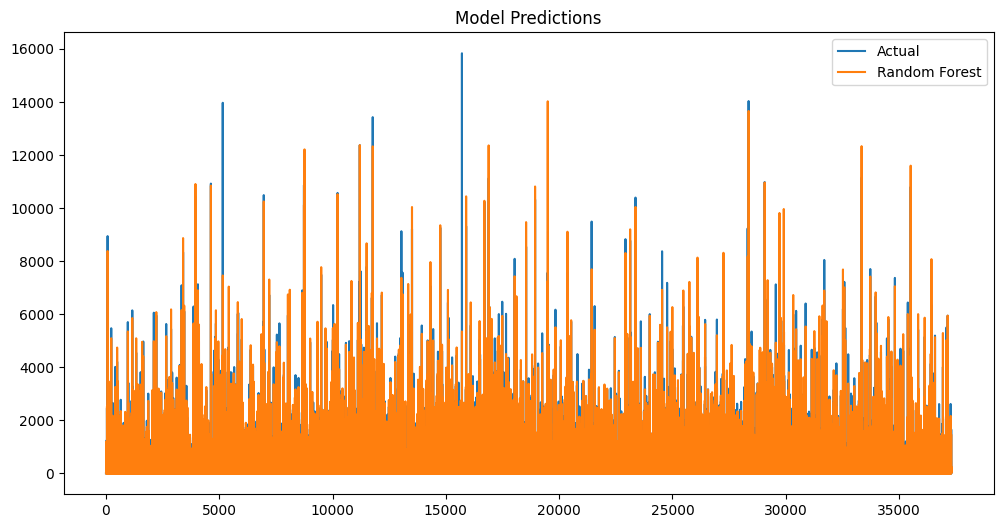

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(Y_pred_rf, label='Random Forest')

plt.legend()
plt.title('Model Predictions')
plt.show()

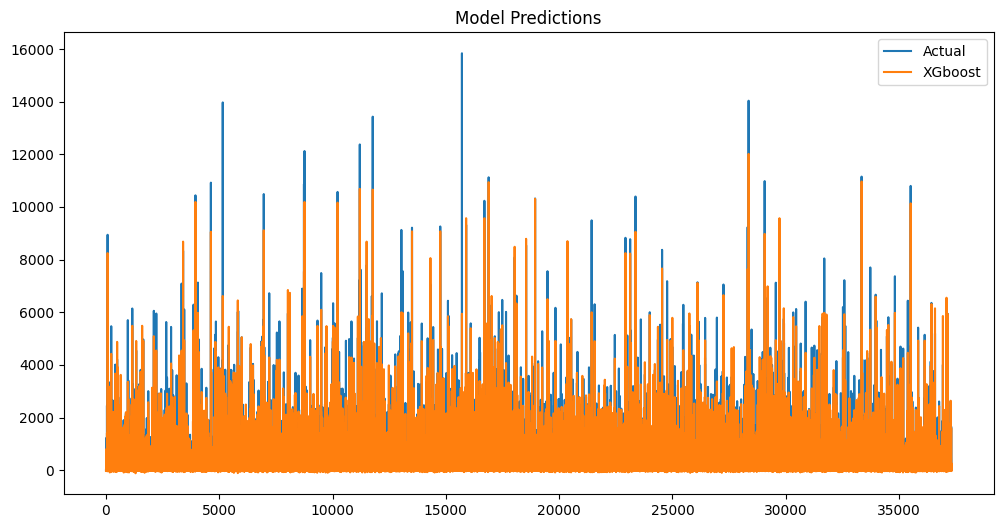

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(Y_pred_xgb, label='XGboost')

plt.legend()
plt.title('Model Predictions')
plt.show()

#Feature Importance

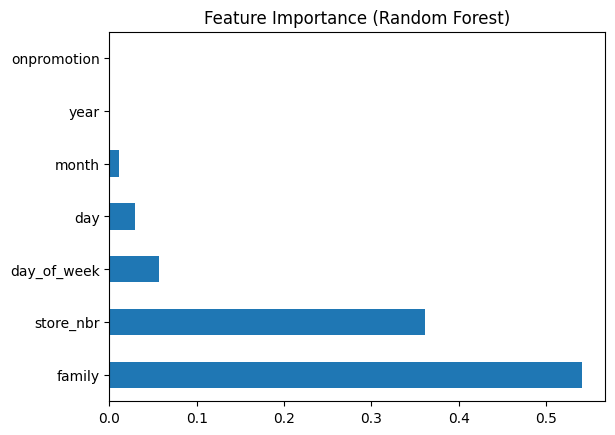

In [92]:
feature_importance_rf = pd.Series(model_rf.feature_importances_, index=X_train.columns)
feature_importance_rf.nlargest(10).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()

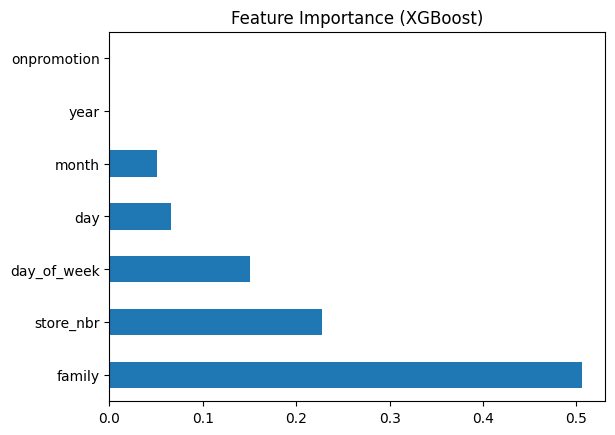

In [93]:
feature_importance_xgb = pd.Series(model_xgb.feature_importances_, index=X_train.columns)
feature_importance_xgb.nlargest(10).plot(kind='barh')
plt.title('Feature Importance (XGBoost)')
plt.show()

<ipython-input-122-101503df22f4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='RMSE', data=error_df, palette='muted')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


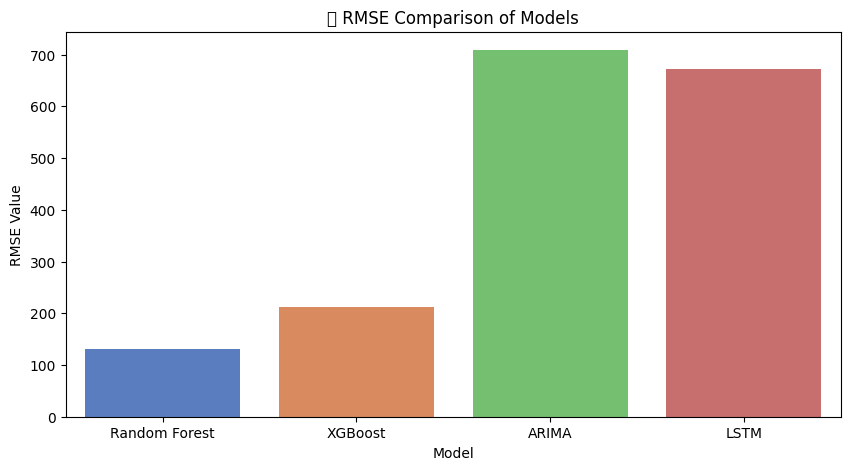

In [122]:
# Error comparison for models
error_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost', 'ARIMA', 'LSTM'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, Y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, Y_pred_xgb)),
             np.sqrt(mean_squared_error(y_test, Y_pred_arima)),
             np.sqrt(mean_squared_error(y_test, Y_pred_lstm.flatten()))]
})

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='RMSE', data=error_df, palette='muted')
plt.title('📈 RMSE Comparison of Models')
plt.ylabel('RMSE Value')
plt.show()


#Predictions

In [99]:
test=pd.read_csv('test.csv')

In [109]:
test

,id,date,store_nbr,family,onpromotion,day,month,year,day_of_week
0,3000888,2017-08-16,1,0,0,16,8,2017,2
1,3000889,2017-08-16,1,1,0,16,8,2017,2
2,3000890,2017-08-16,1,2,2,16,8,2017,2
3,3000891,2017-08-16,1,3,20,16,8,2017,2
4,3000892,2017-08-16,1,4,0,16,8,2017,2
...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,28,1,31,8,2017,3
28508,3029396,2017-08-31,9,29,0,31,8,2017,3
28509,3029397,2017-08-31,9,30,1,31,8,2017,3
28510,3029398,2017-08-31,9,31,9,31,8,2017,3


In [100]:
test['date']=pd.to_datetime(test['date'])

In [101]:
test['day'] = test['date'].dt.day
test['month'] = test['date'].dt.month
test['year'] = test['date'].dt.year
test['day_of_week'] = test['date'].dt.weekday

In [103]:
test['family'] = le.fit_transform(test['family'])

In [105]:
test_f = test.drop(columns=['id'])  # Remove inplace=True
test_f = test_f[['store_nbr', 'family', 'day', 'month', 'year', 'day_of_week','onpromotion']] # Select the same features used for training
test_pred=model_rf.predict(test_f)

In [106]:
test_pred

array([ 2.41   ,  0.     ,  3.54   , ...,  0.04   ,  0.     , 30.64218])

In [111]:
subst = pd.DataFrame({'id': test['id'], 'sales': test_pred})

In [112]:
subst

,id,sales
0,3000888,2.410000
1,3000889,0.000000
2,3000890,3.540000
3,3000891,998.160000
4,3000892,0.000000
...,...,...
28507,3029395,307.520766
28508,3029396,61.540000
28509,3029397,0.040000
28510,3029398,0.000000


In [74]:
sub=pd.read_csv('sample_submission.csv')

In [75]:
sub

,id,sales
0,3000888,0.0
1,3000889,0.0
2,3000890,0.0
3,3000891,0.0
4,3000892,0.0
...,...,...
28507,3029395,0.0
28508,3029396,0.0
28509,3029397,0.0
28510,3029398,0.0
